In [1]:
# Import libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Extract data (keep unaltered)
data_orig = pd.read_csv('../ETL/Load/stockData.csv', header=(0), sep=';')

FileNotFoundError: [Errno 2] No such file or directory: '../ETL/Load/stockData.csv'

In [119]:
# Describe original Data
data_orig.describe()

,PE,BVPS,ROE,DPR,DY,PBR,CA,GROSS_DEBT,ANS,CURRENT_RATIO,EPS,CLASS
count,11363.000000,11363.000000,11363.000000,11363.000000,11363.000000,11363.000000,1.136300e+04,1.136300e+04,1.136300e+04,1.136300e+04,11363.000000,11363.000000
mean,-531.526993,33.890718,-0.025214,0.338965,4.741765,51.899025,1.533774e+10,1.978991e+10,3.818294e+09,inf,3.918511,0.097421
std,15684.409094,508.396423,3.095612,2.592203,78.270803,1018.558834,2.748858e+10,6.773164e+10,2.313760e+10,NaN,91.344843,0.296544
min,-765054.927367,-664.507625,-63.574215,-66.250000,-0.000000,-1249.308423,6.943000e+06,0.000000e+00,4.469333e+04,7.070553e-02,-111.585170,0.000000
25%,2.253817,5.016680,0.036619,0.000000,0.003078,0.683753,1.824915e+09,1.206523e+09,2.530056e+08,1.164050e+00,0.170000,0.000000
50%,8.823358,9.895760,0.120799,0.282966,0.021980,1.576686,5.417423e+09,3.935138e+09,7.231214e+08,1.629700e+00,0.920250,0.000000
75%,23.116721,17.793117,0.197393,0.594902,0.058705,3.693672,1.594072e+10,1.333942e+10,1.821185e+09,2.419938e+00,2.175100,0.000000
max,12635.786682,14885.774638,11.746541,45.098061,2196.206875,38484.339615,2.149780e+11,7.532630e+11,4.176953e+11,inf,2770.000000,1.000000


In [120]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [121]:
# List of features and the class column
features = data_orig.columns.tolist()[2:-1]
binary_class = data_orig.columns.tolist()[-1]

data_cleaned = data_orig.copy()
# Clean outliers from data
for feature in features:
    data_cleaned = remove_outliers_iqr(data_cleaned, feature)

# Describe original Data
data_cleaned.describe()

,PE,BVPS,ROE,DPR,DY,PBR,CA,GROSS_DEBT,ANS,CURRENT_RATIO,EPS,CLASS
count,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3.930000e+03,3.930000e+03,3.930000e+03,3930.000000,3930.000000,3930.000000
mean,15.171786,11.477600,0.123362,0.375780,0.032707,1.896938,6.593913e+09,5.671715e+09,8.451741e+08,1.854838,1.303985,0.074555
std,12.284526,6.935999,0.081779,0.315859,0.029513,1.340371,6.602356e+09,5.631547e+09,6.974388e+08,0.741338,1.077003,0.262705
min,-28.649556,0.462427,-0.135531,-0.392212,-0.000000,0.000023,6.943000e+06,0.000000e+00,1.176409e+07,0.070706,-1.530000,0.000000
25%,7.497274,6.859679,0.069894,0.151406,0.010127,0.817868,1.641615e+09,1.567034e+09,3.027023e+08,1.281197,0.610000,0.000000
50%,13.699487,10.036594,0.120799,0.323833,0.023557,1.613506,3.826031e+09,3.467102e+09,6.418050e+08,1.782728,1.085700,0.000000
75%,21.544142,15.354415,0.171704,0.560370,0.049007,2.624769,9.402316e+09,7.967229e+09,1.165015e+09,2.368514,1.955500,0.000000
max,53.528144,37.318157,0.395090,1.345217,0.133544,5.874681,3.322000e+10,2.241587e+10,3.078155e+09,4.136707,4.275300,1.000000


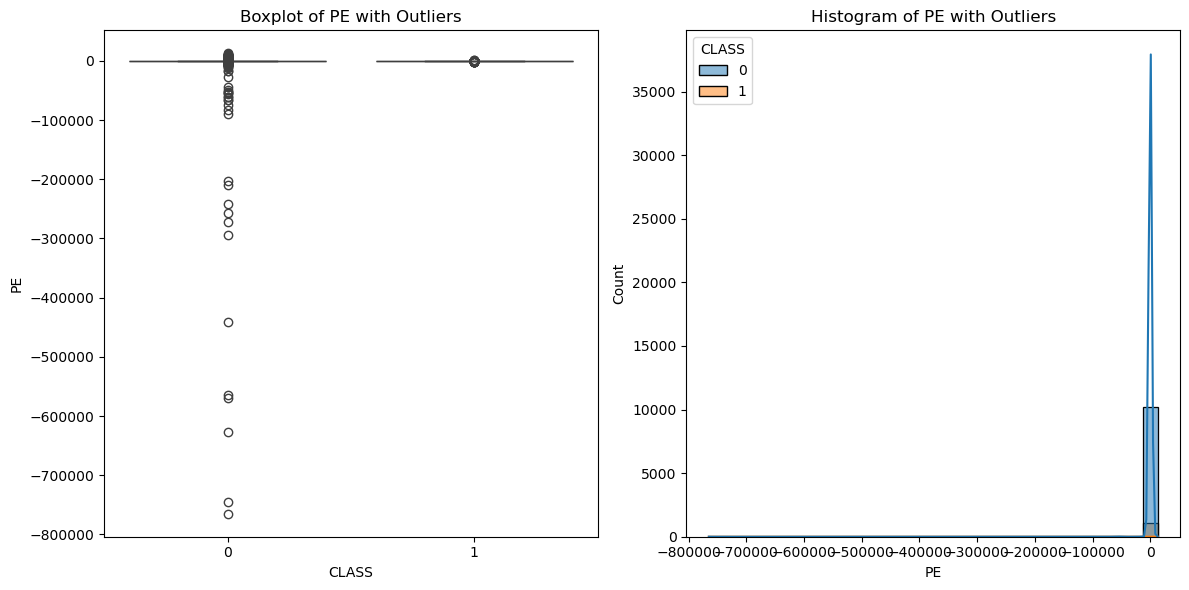

12635.786682001768
-765054.9273674677


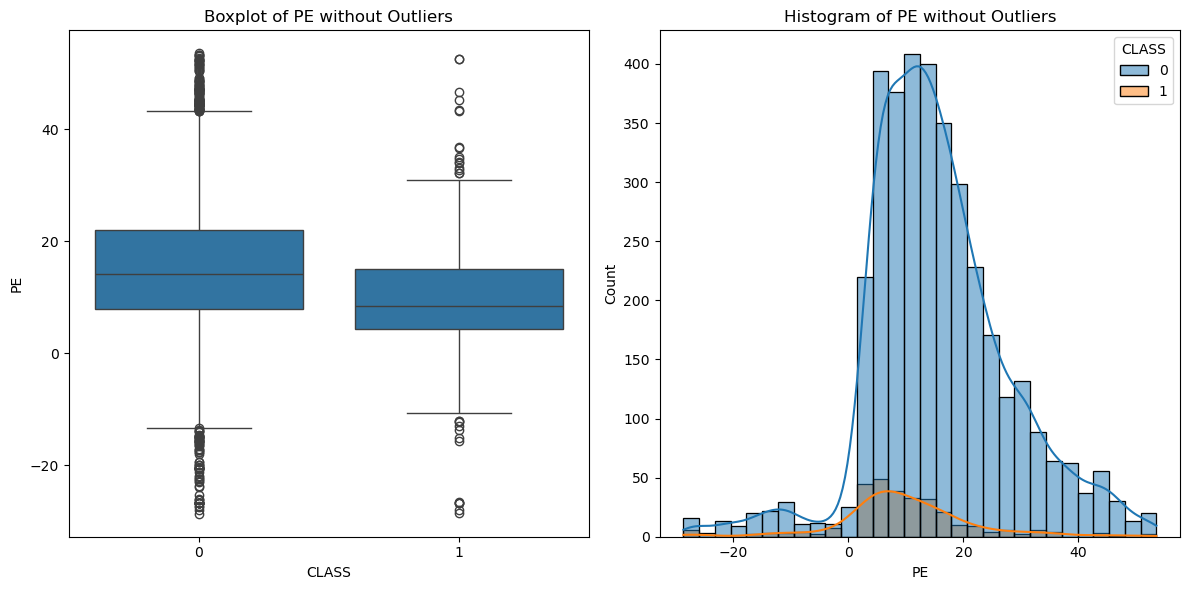

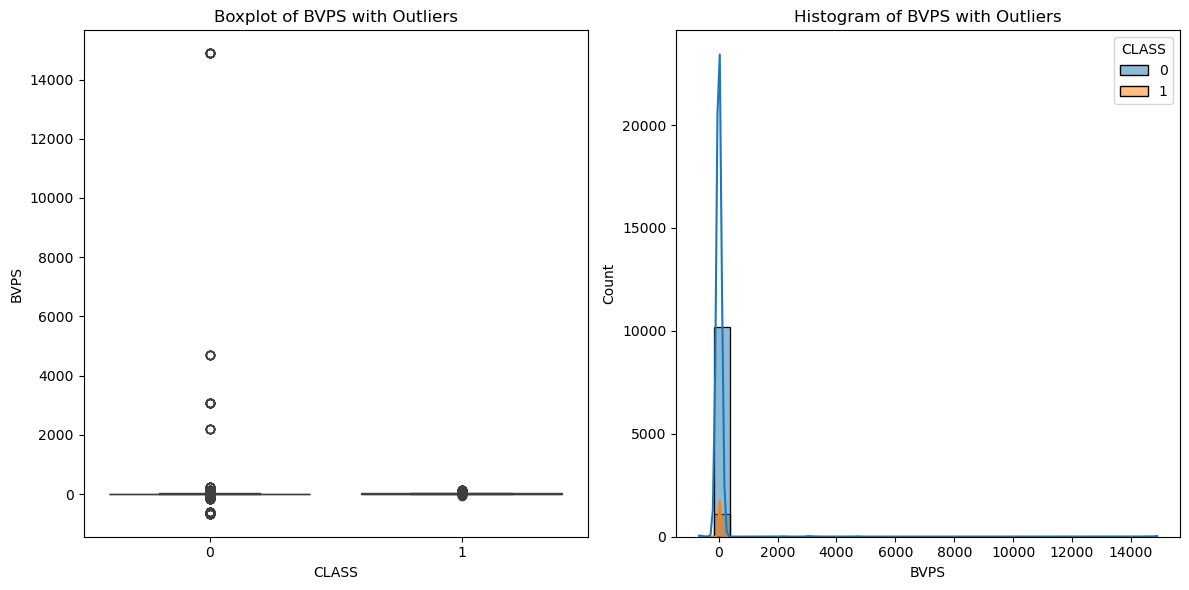

14885.77463775932
-664.5076247211865


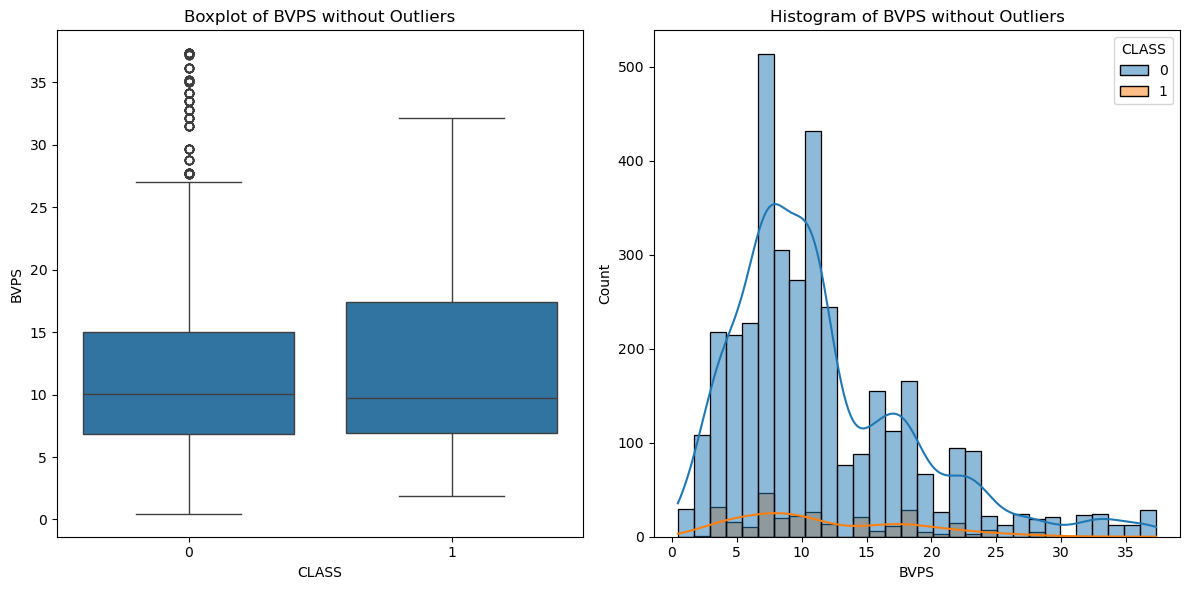

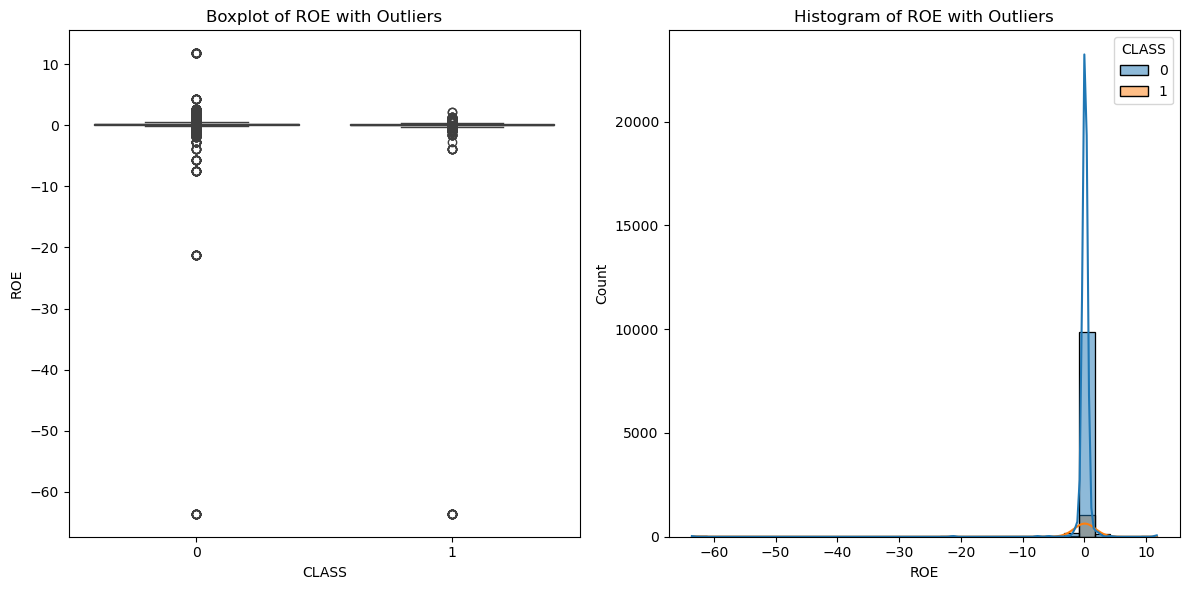

11.746541057095554
-63.57421451787649


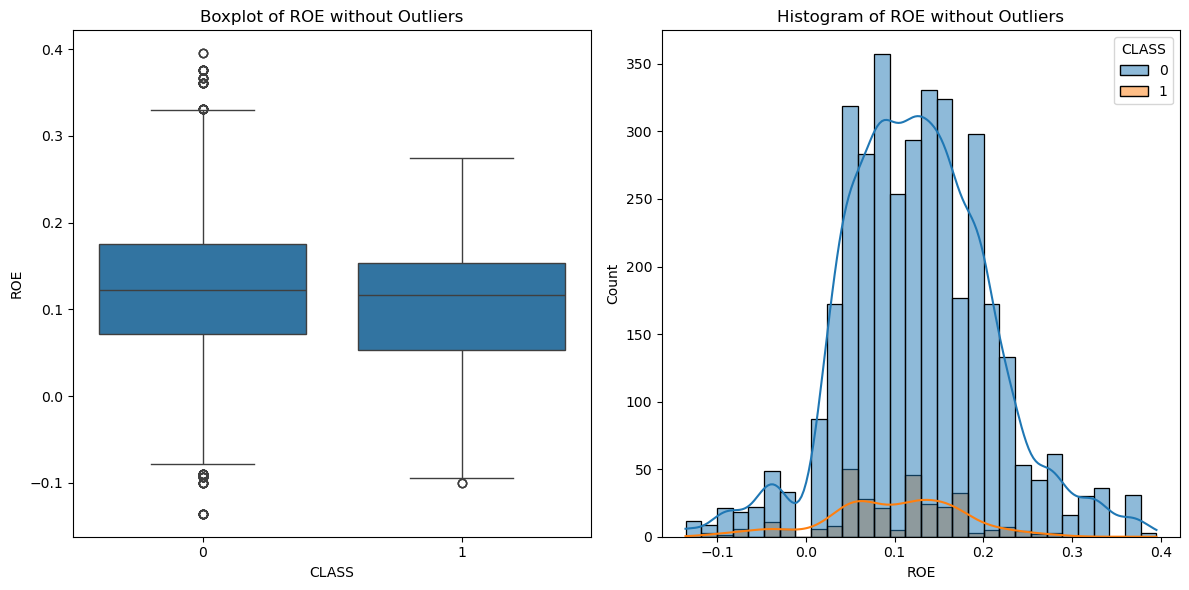

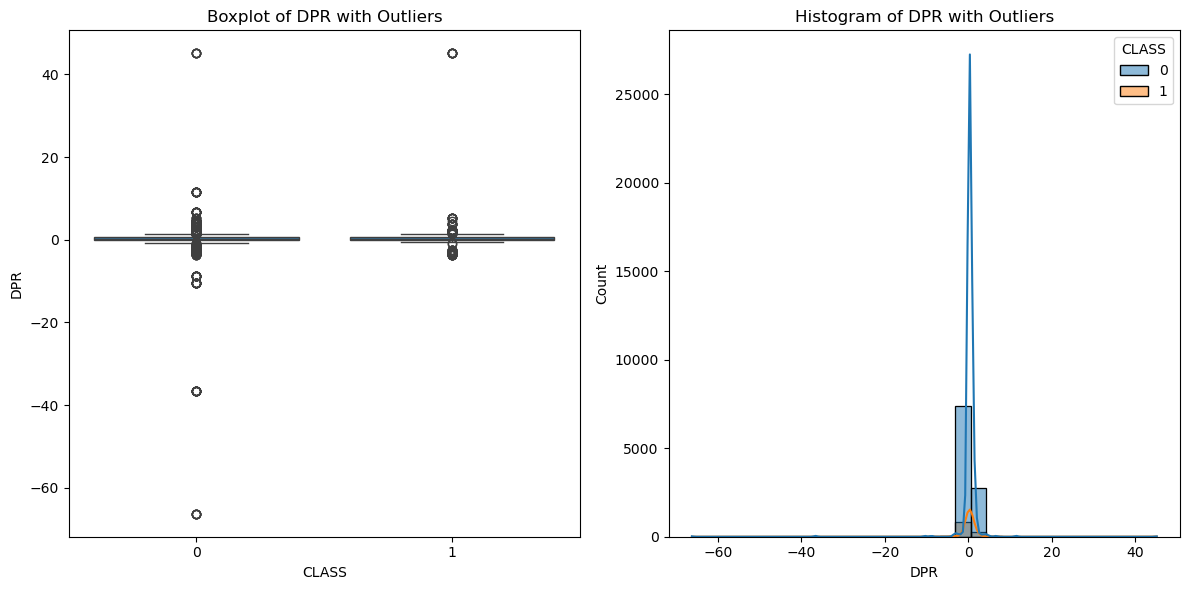

45.098060914075454
-66.25


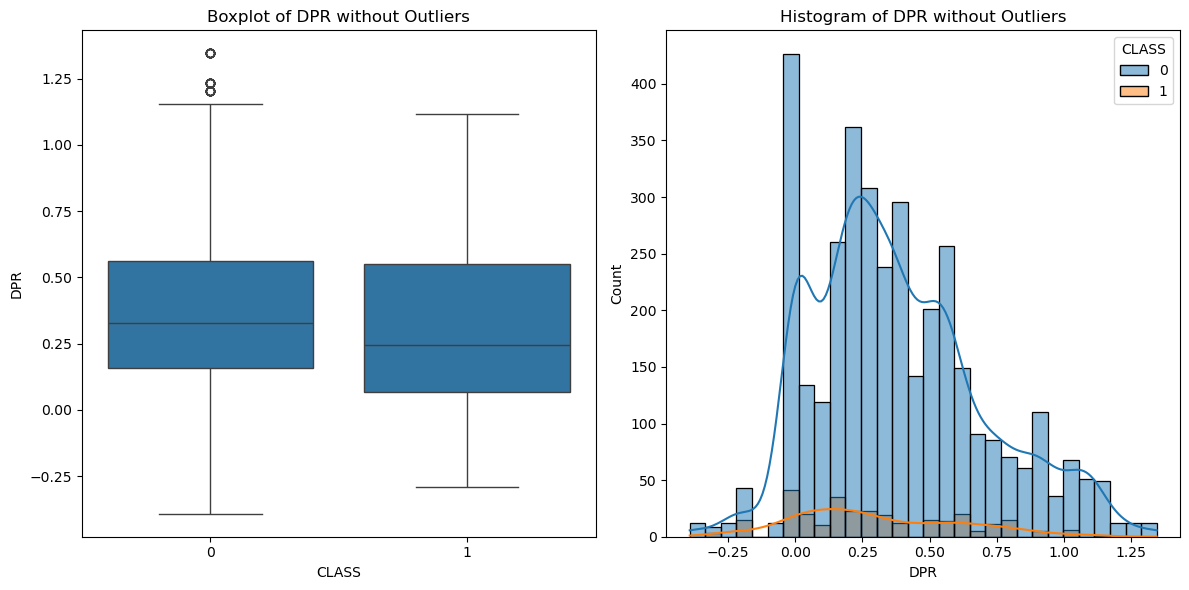

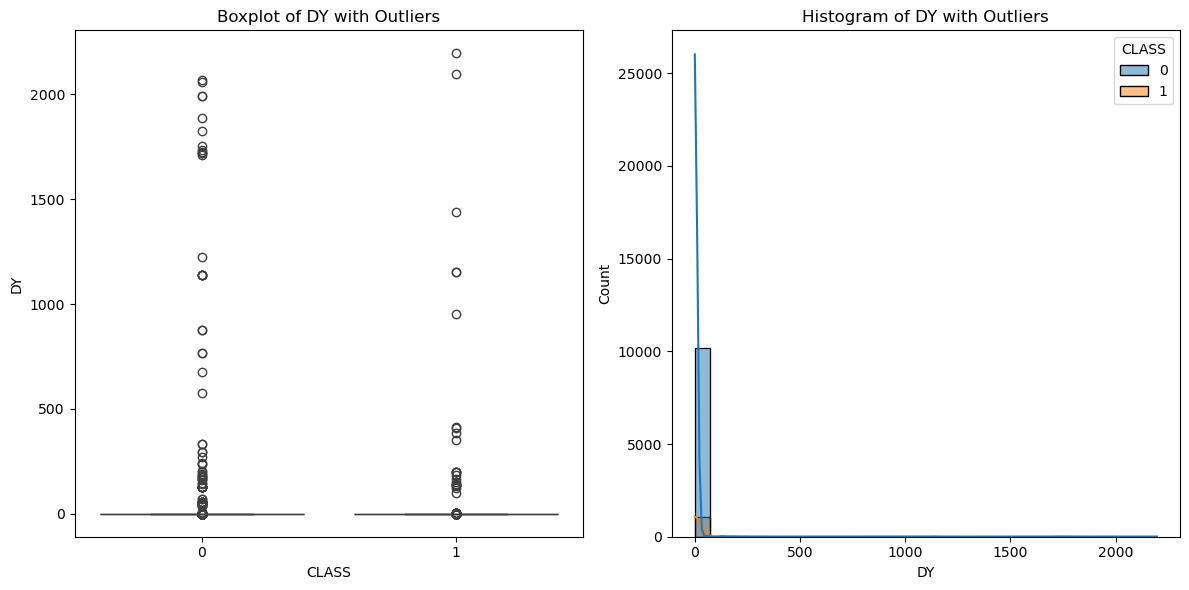

2196.2068751074703
-0.0


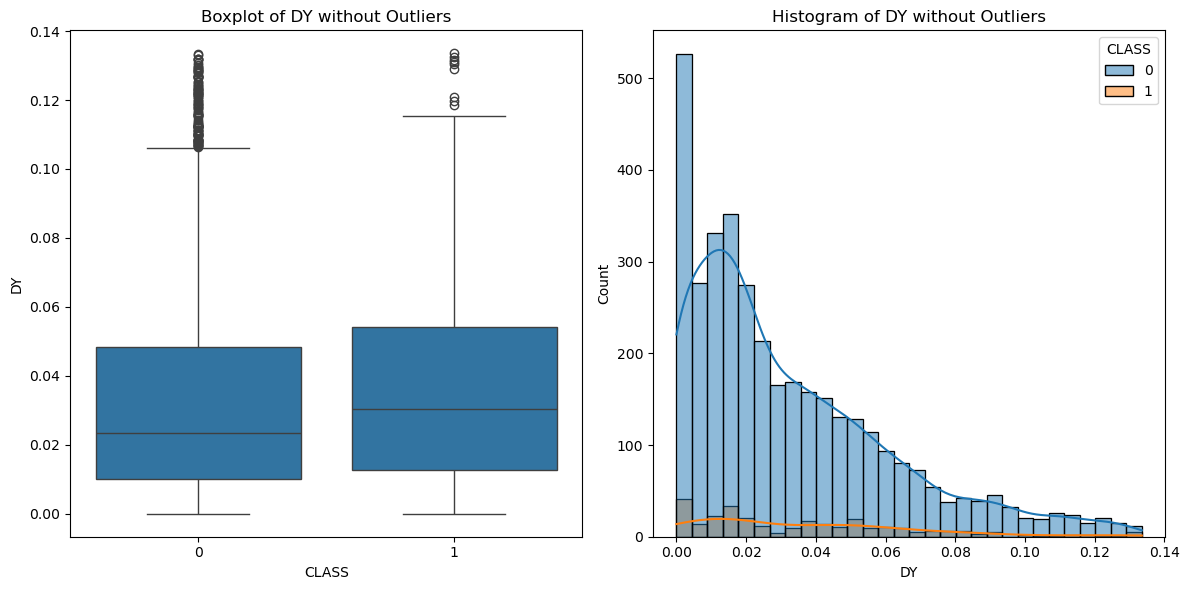

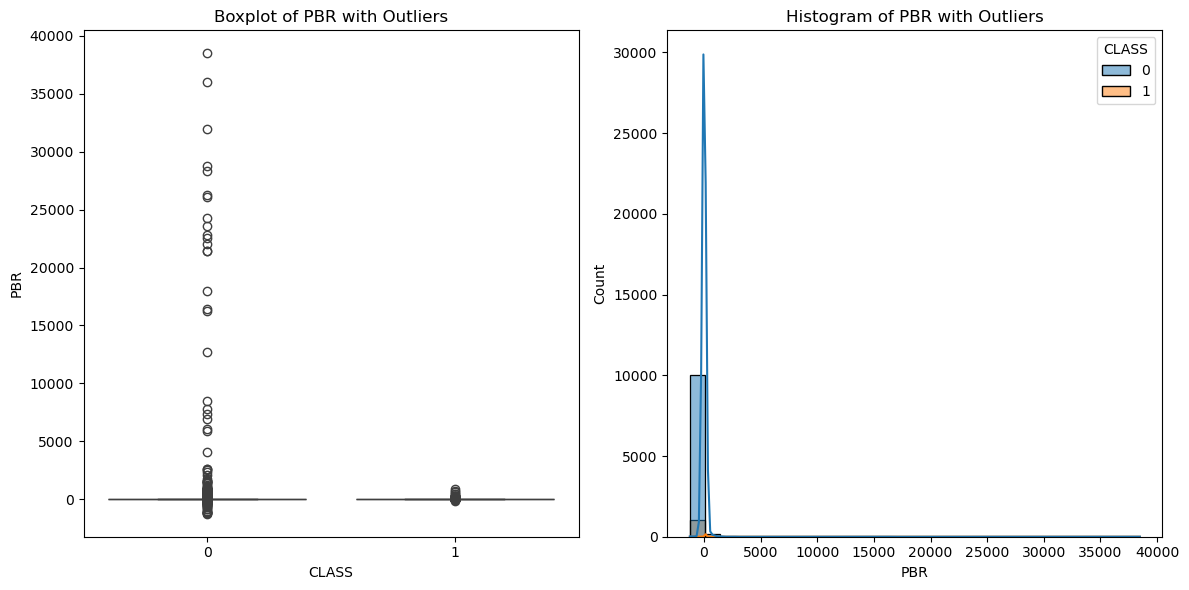

38484.33961510646
-1249.308422565923


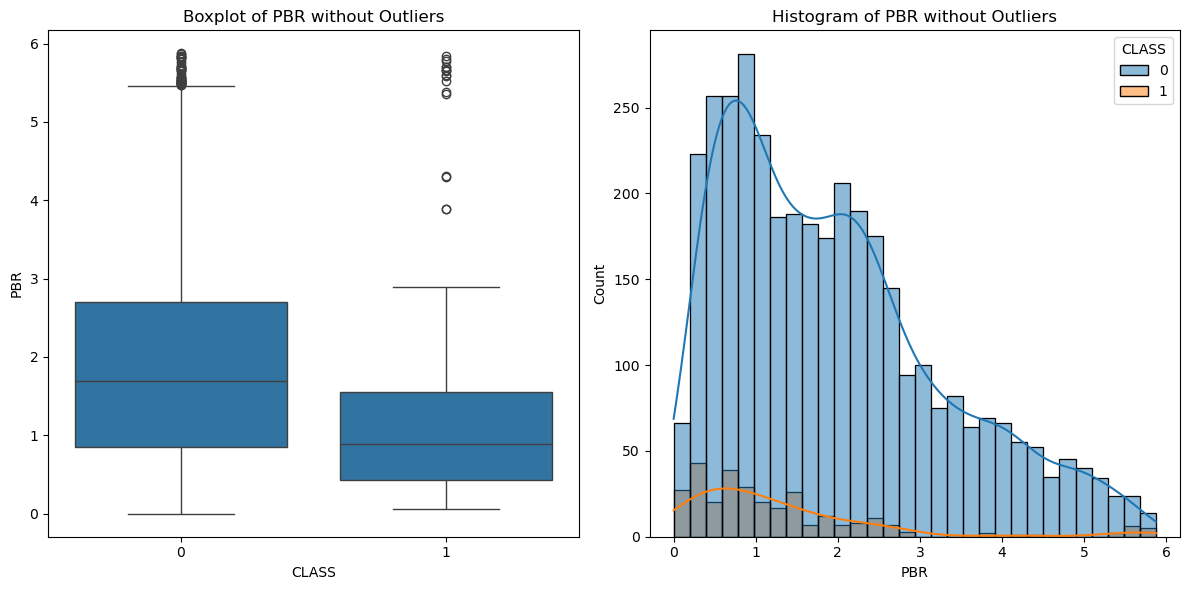

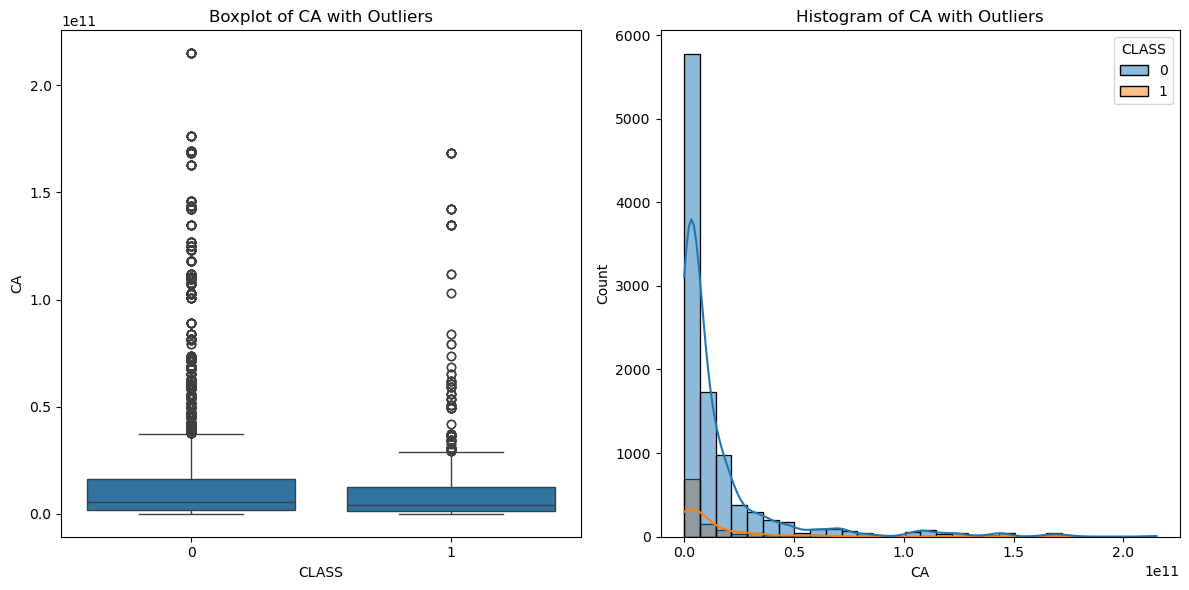

214978000000.0
6943000.0


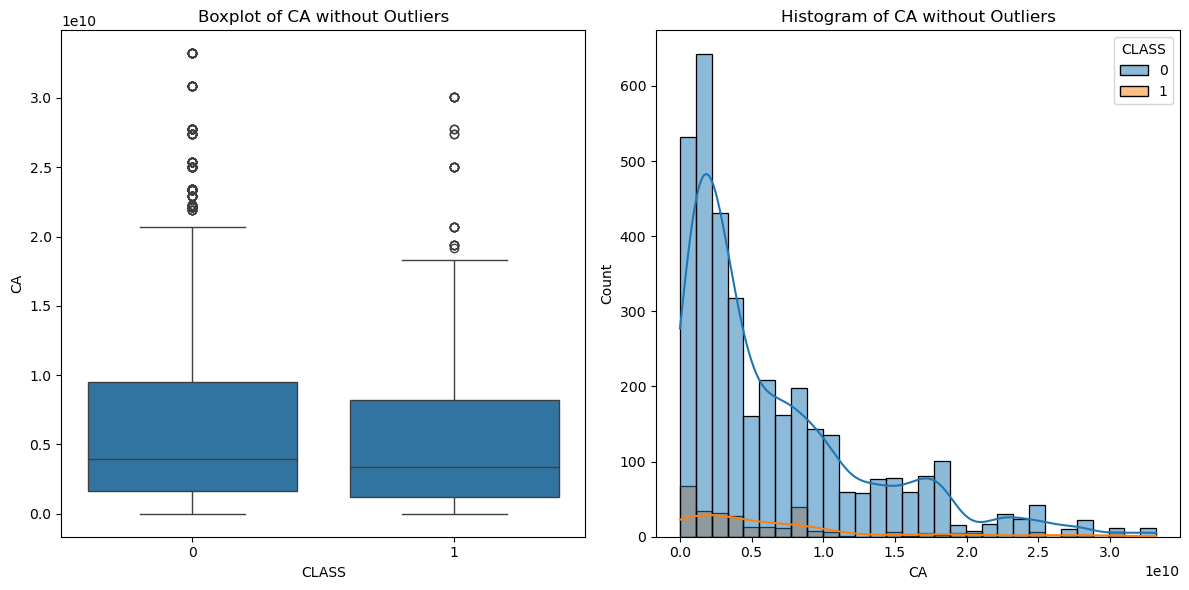

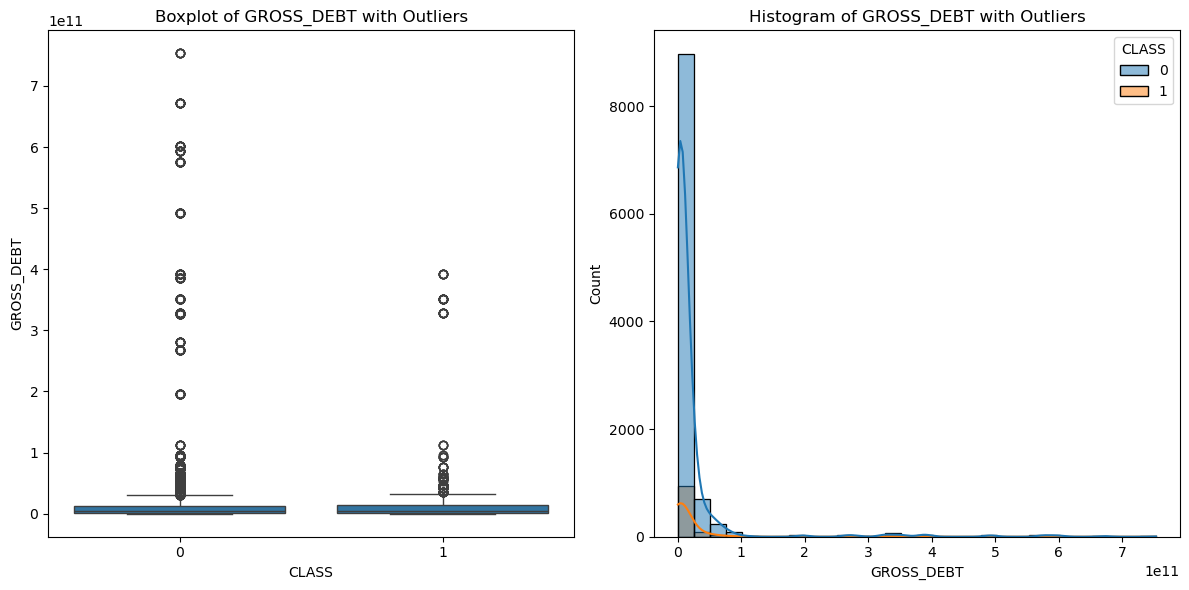

753263047000.0
0.0


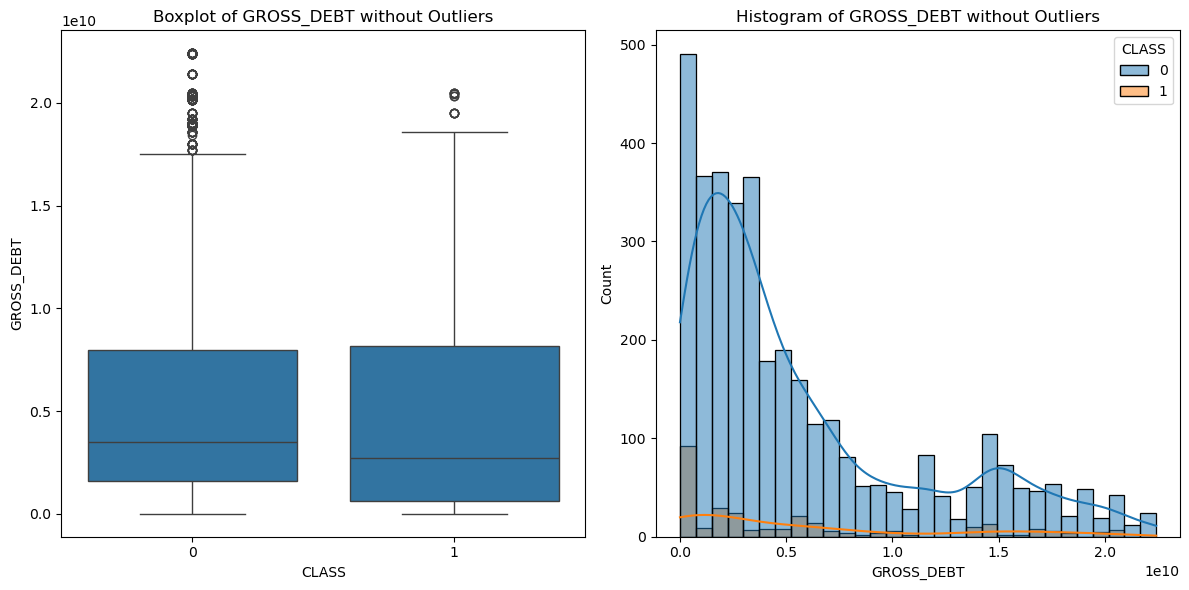

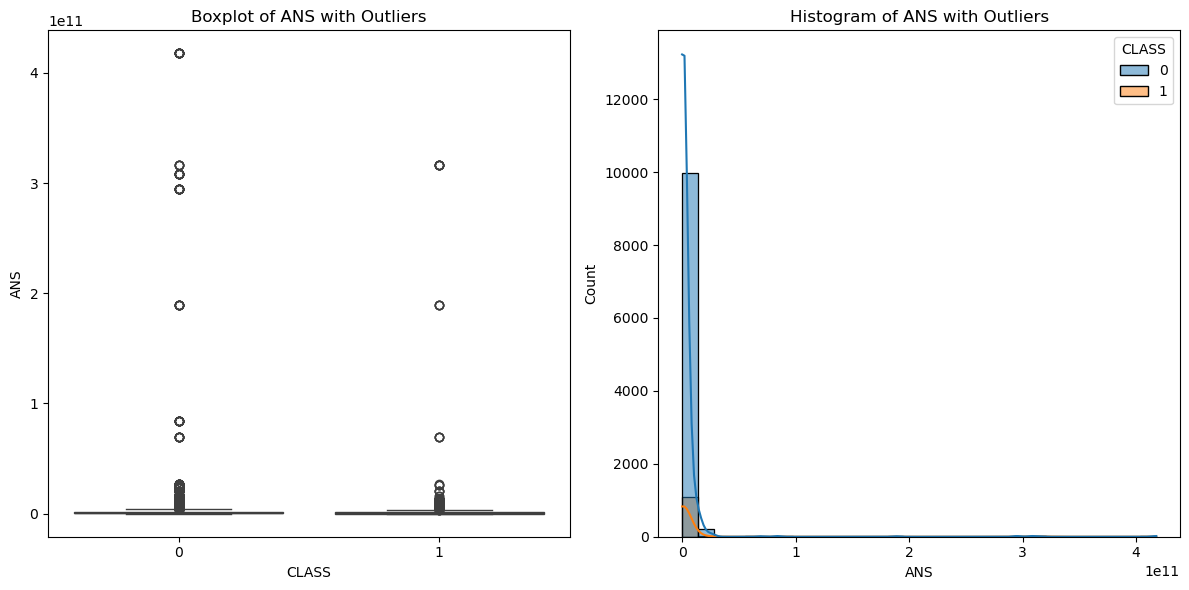

417695332823.2594
44693.333333333336


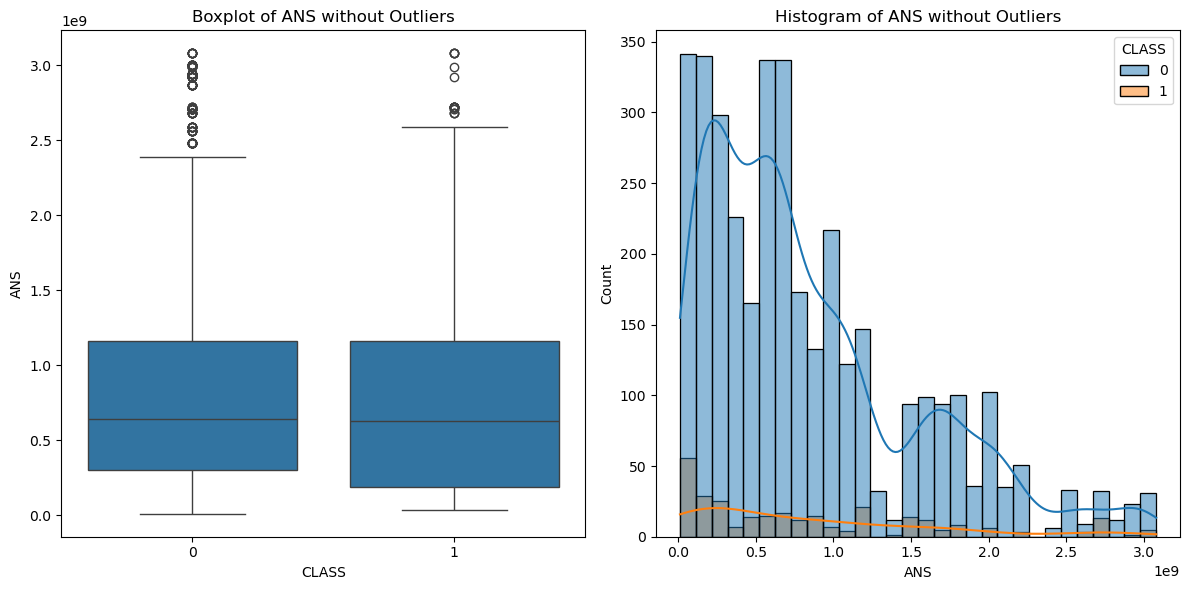

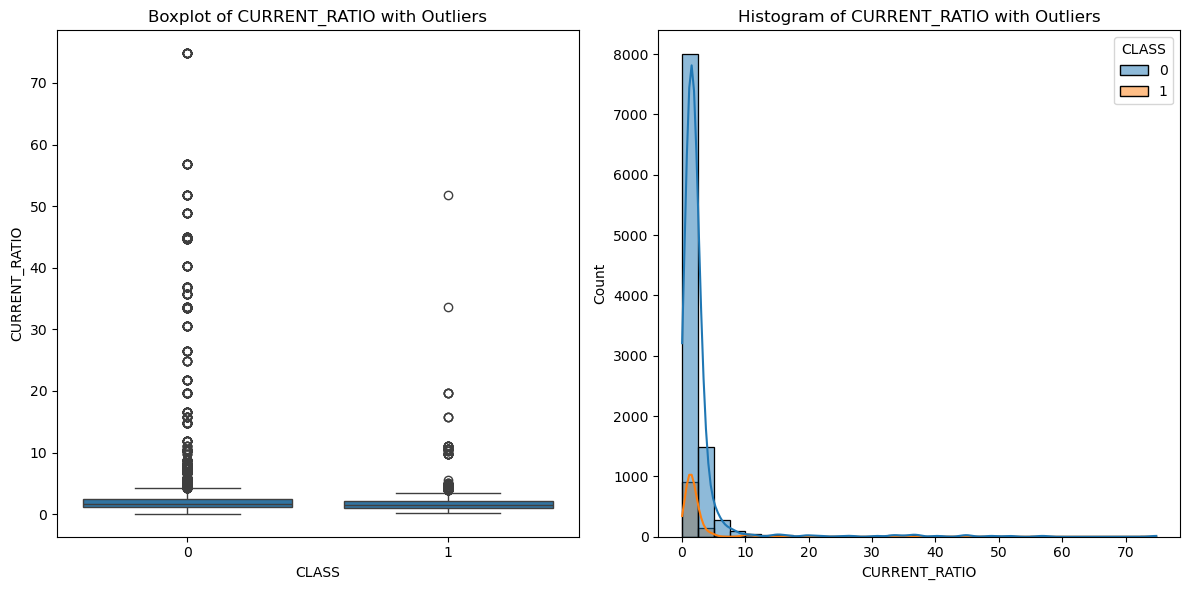

inf
0.07070552772007


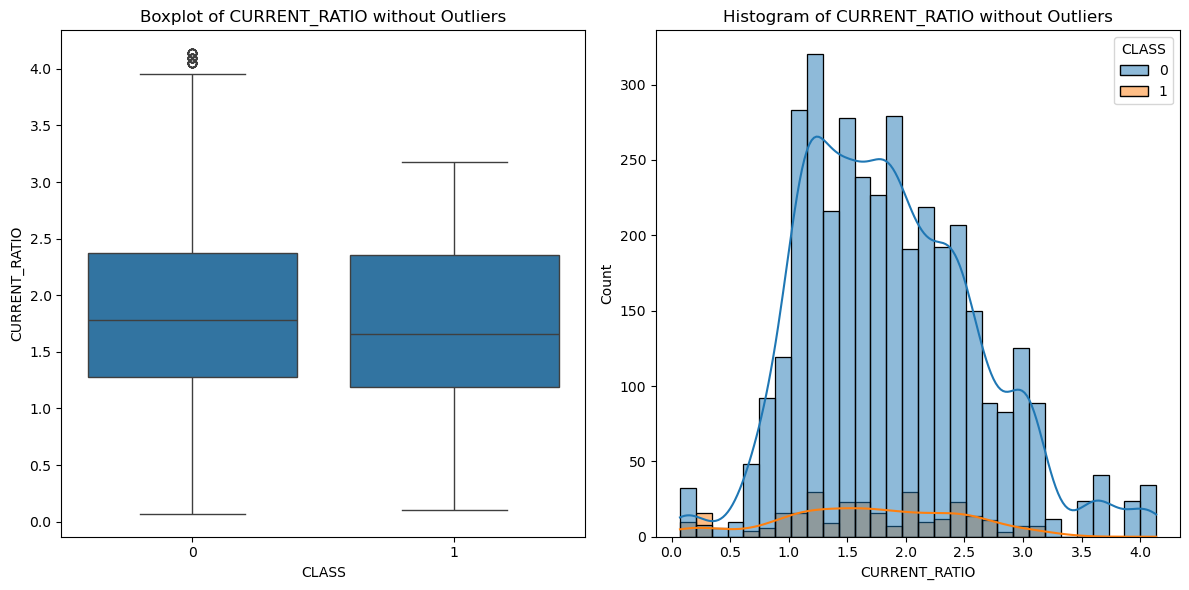

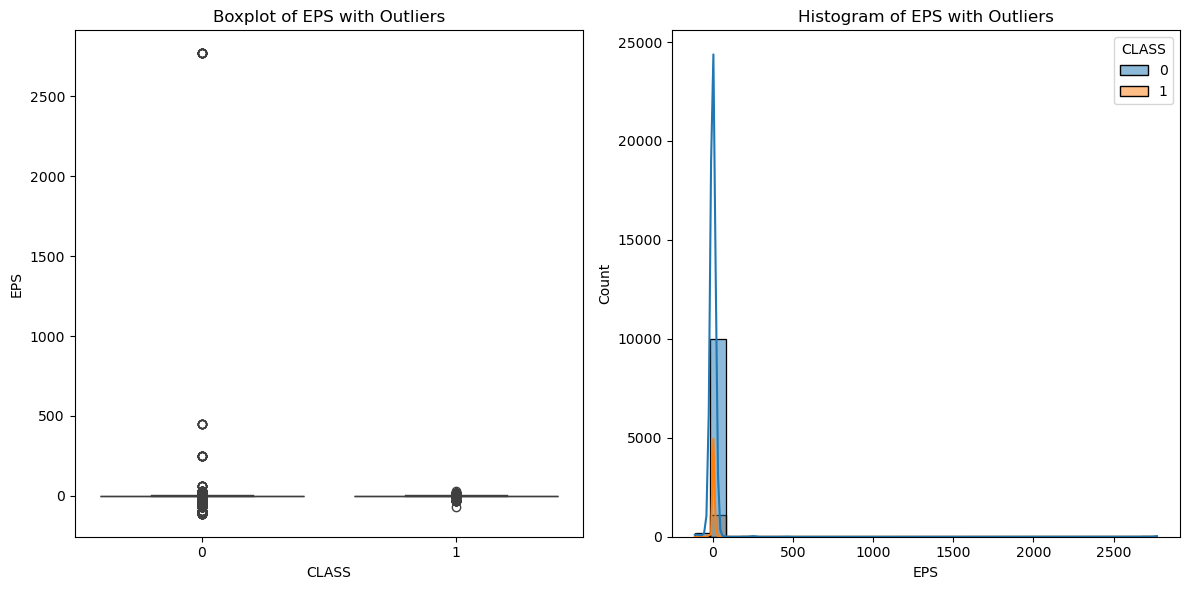

2770.0
-111.58517


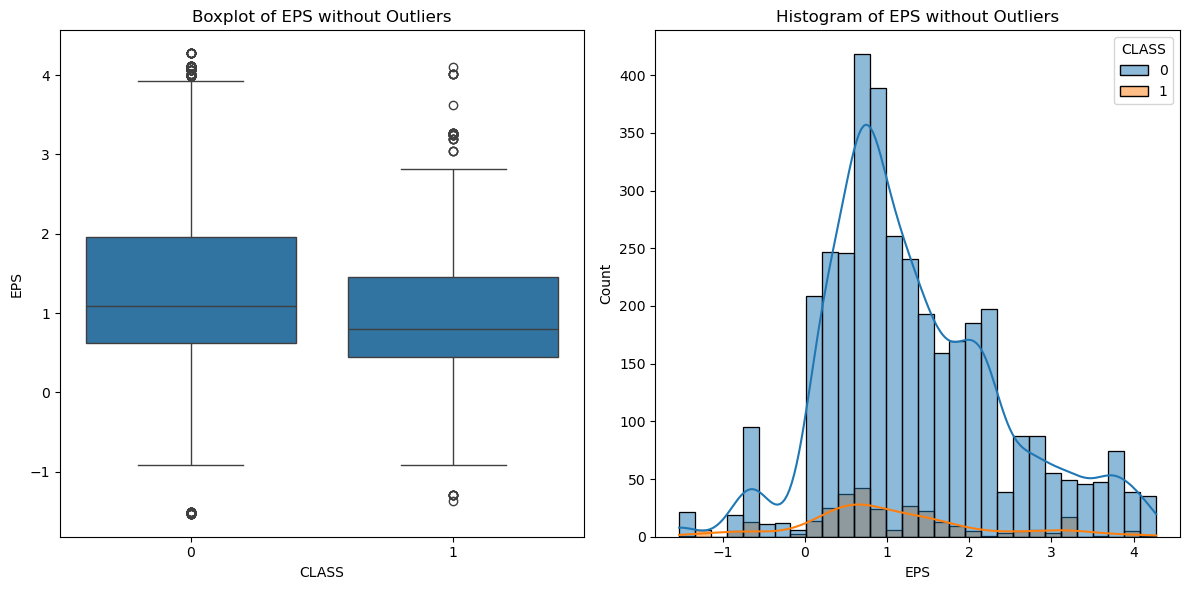

In [122]:
# Boxplots and histograms with and without outliers for all the features

# List of features and the class column
features = data_orig.columns.tolist()[2:-1]
binary_class = data_orig.columns.tolist()[-1]

# Plotting boxplots and histograms
for feature in features:
    # Original data
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data_orig, x=binary_class, y=feature)
    plt.title(f'Boxplot of {feature} with Outliers')
    
    plt.subplot(1, 2, 2)
    sns.histplot(data=data_orig, x=feature, hue=binary_class, kde=True, bins=30)
    plt.title(f'Histogram of {feature} with Outliers')
    plt.tight_layout()
    plt.show()
    
    # Data without outliers
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data_cleaned, x=binary_class, y=feature)
    plt.title(f'Boxplot of {feature} without Outliers')
    
    plt.subplot(1, 2, 2)
    sns.histplot(data=data_cleaned, x=feature, hue=binary_class, kde=True, bins=30)
    plt.title(f'Histogram of {feature} without Outliers')
    plt.tight_layout()
    plt.show()